# Tutorial 02: Introduction to the ERPparam object

This tutorial will introduce the ERPparam object. We will highlight some key methods and attributes, while a later tutorial, tutorial_04-attributes_and_methods, will provide a more in-depth explanation.

In [1]:
# imports

# standard
import numpy as np

# ERPparam
import sys
sys.path.append('../')
from ERPparam.tests.tutils import default_params
from ERPparam.sim import simulate_erp
from ERPparam import ERPparam
from ERPparam.plts import plot_signals


In [2]:
# settings

# set the random seed for reproducibility
np.random.seed(4)

## Fitting ERPparam model
Intro basic arguments to `ERPparam` and `ERPparam.fit()`

Again, we will begin by simulating an example event-related potential (ERP). 

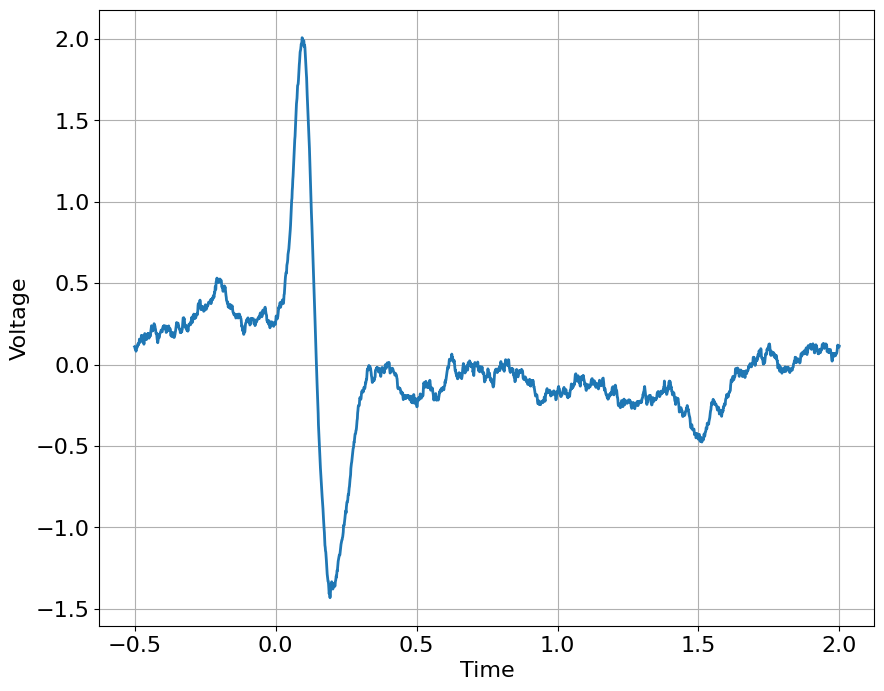

In [ ]:
# simulate and plot an ERP

time_range, erp_params, nlv = default_params()
time, erp = simulate_erp(time_range, erp_params, nlv)
plot_signals(time, erp)

Now we will fit our model. Here, we will demonstrate the use of `ERPparam.report()`, which both fits the model and displays the results.

                                                                                                  
                                             ERP MODEL                                            
                                                                                                  
                                       2 peaks were found:                                        
                 Time:   0.10, Amp:   1.98, Dur:  0.06, Sym: 0.60, Sharp: 0.9775                  
                 Time:   0.20, Amp:  -1.37, Dur:  0.10, Sym: 0.39, Sharp: 0.9509                  
                                                                                                  
                                     Goodness of fit metrics:                                     
                                    R^2 of model fit is 0.7888                                    
                                    Error of the fit is 0.1573                                    
          

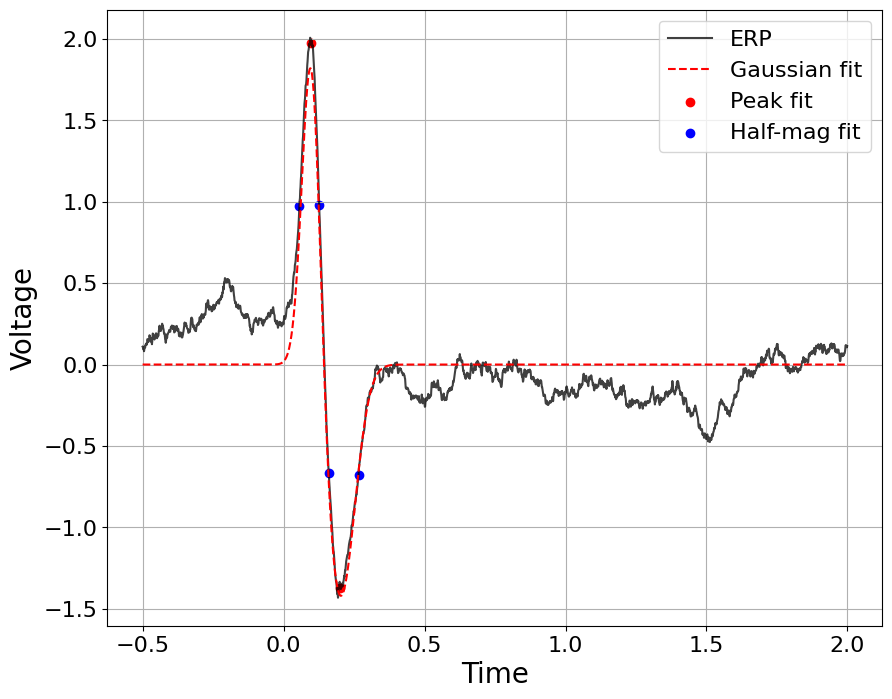

In [4]:
# apply ERPparam

# initialize object with desired hyperparameters settings
model = ERPparam(peak_threshold=5, gauss_overlap_thresh=3)

# in tutorial_01-module_overview, we learned to apply these methods sequentially
# model.fit(time, erp)
# model.print_results() # print summary of results
# model.plot()  # plot the ERP and the model fit

# alternatively, you can use the report method to both fit the model and plot/print the results in one step.
model.report(time, erp)

One can also fit a specified time range only using the `time_range` argument. This can be useful for isolating the post-stimulus period, or a particular time window of interest. In the example below, we limit the range to the first 200 ms after the stimulus to isolate the first peak only.

                                                                                                  
                                             ERP MODEL                                            
                                                                                                  
                                       1 peaks were found:                                        
                 Time:   0.09, Amp:   1.96, Dur:  0.06, Sym: 0.48, Sharp: 0.9769                  
                                                                                                  
                                     Goodness of fit metrics:                                     
                                    R^2 of model fit is 0.7801                                    
                                    Error of the fit is 0.3853                                    
                                                                                                  


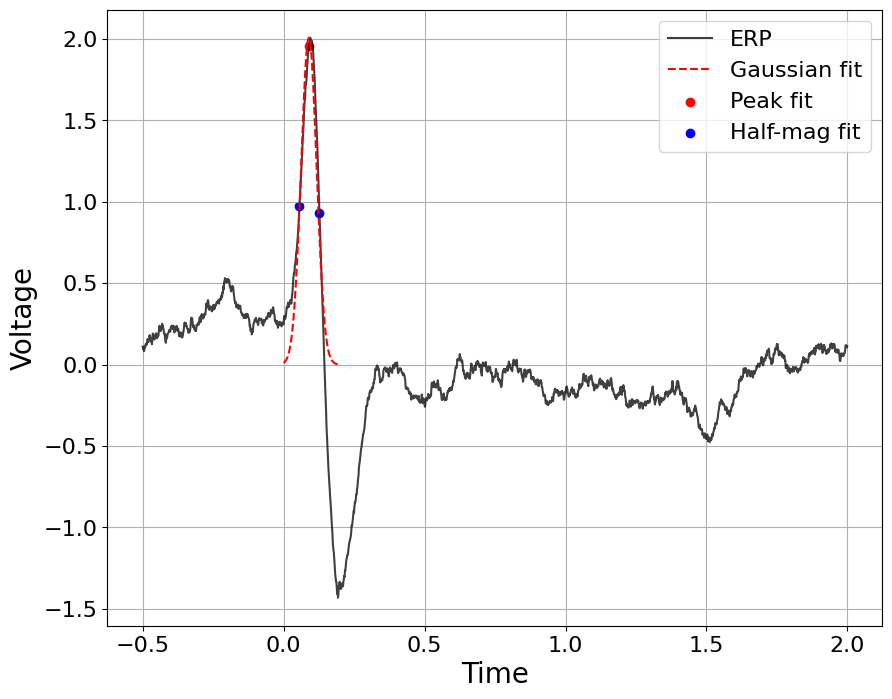

In [7]:
# apply ERPparam - with `time_range` argument

model = ERPparam(peak_threshold=5)
model.report(time, erp, time_range=[0, 0.2]) 

The other argument to `ERPparam.fit()` or `ERPparam.report()` is `baseline`. This sets the time window used to set the relative peak threshold (`peak_threshold`). By default, the signal preceding time=0 is used; if there is no pre-stimulus time, the entire signal used. Remember, `peak_threshold` is in units of standard deviations above the mean baseline signal. So in the examples above, only peaks that are 5 standard deviations above the mean signal valtage before time=0 are parameterized. The `baseline` argument could be useful if your data contains a long pre-stimulus period with potential artifacts from behavior on the previous trial, for example.  

                                                                                                  
                                             ERP MODEL                                            
                                                                                                  
                                       2 peaks were found:                                        
                 Time:   0.10, Amp:   1.70, Dur:  0.06, Sym: 0.56, Sharp: 0.9768                  
                 Time:   0.21, Amp:  -1.57, Dur:  0.09, Sym: 0.47, Sharp: 0.9595                  
                                                                                                  
                                     Goodness of fit metrics:                                     
                                    R^2 of model fit is 0.7225                                    
                                    Error of the fit is 0.1616                                    
          

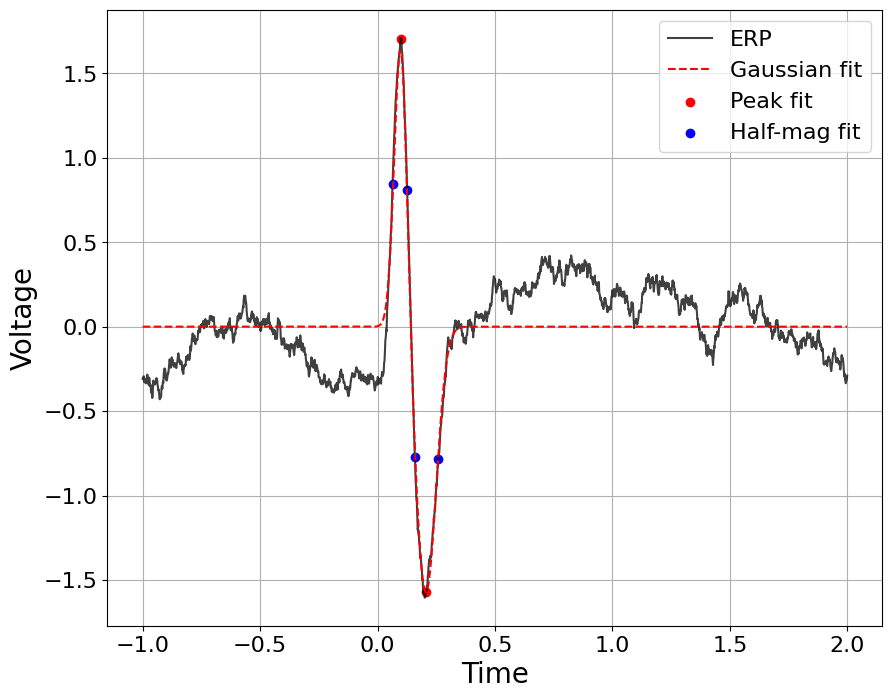

In [10]:
# apply ERPparam - with `baseline` argument

# simulate ERP with long pre-stimulus period
time_range_long = [-1, 2]
time, erp = simulate_erp(time_range_long, erp_params, nlv)

# apply model
model = ERPparam(peak_threshold=5)
model.report(time, erp, baseline=[-0.5, 0]) 

## Accessing ERPparam results
Intro basic `ERPparam` attributes including model results and waveform shape parameters

In [19]:
# Fit example data
model = ERPparam(peak_threshold=5, gauss_overlap_thresh=3)
model.fit(*simulate_erp(*default_params()))

### Gaussian parameters

Gaussian parameters describe the model fit to the ERP. As discussed in tutorial_01-module_overview, each Gaussian is defined:
$G(t)_n = a * exp (\frac{- (t - \mu)^2}{2 * \sigma^2})$

where $t$ is time, $a$ is the amplitude of the peak, $\mu$ is the mean (peak time), and $\sigma$ is the standard deviation (peak width).  
These results are stored in `ERPparam.gaussian_params_` and can be accessed using `ERPparam.get_params()`. `ERPparam.gaussian_params_` is a 2D array in which each row is a peak; and the parameters are in the following order: peak time, amplitude, and width. If fitting with skewed Gaussians, the fourth column is the skew parameter. 

In [33]:
# print Gausian parameters
print(f"Gaussian parameters:\n{model.gaussian_params_}\n")

# use `get_params()` to access the parameters
gaussian_params = model.get_params('gaussian')
print(f"Peak 0 parameters: peak time={gaussian_params[0][0]:0.2f} s, peak amplitude={gaussian_params[0][1]:0.2f} uV, peak width={gaussian_params[0][2]:0.2f} s")
print(f"Peak 1 parameters: peak time={gaussian_params[1][0]:0.2f} s, peak amplitude={gaussian_params[1][1]:0.2f} uV, peak width={gaussian_params[1][2]:0.2f} s")

Gaussian parameters:
[[ 0.09663812  1.8539674   0.02568858         nan]
 [ 0.20121777 -1.24998787  0.04171643         nan]]

Peak 0 parameters: peak time=0.10 s, peak amplitude=1.85 uV, peak width=0.03 s
Peak 1 parameters: peak time=0.20 s, peak amplitude=-1.25 uV, peak width=0.04 s


### Shape parameters
Shape parameters describe the waveform shape of each fitted peak. These results are stored in `ERPparam.shape_params_` and can also be accessed using `ERPparam.get_params()`. `ERPparam.shape_params_` is likewise a 2D array in which each row is a peak; and the parameters are in the following order:
* Peak time: time at index closest to extrema of modelled Gaussian
* Peak amplitude: signal voltage at index closest to extrema of modelled Gaussian
* Peak width: the width of the modelled Gaussian (twice the standard deviation)
* Skew: skewness parameter of the modelled Gaussian
* Full width at half-magnitude (FWHM): This is an additional measure of peak width. It describes the amount of time between the two half-magnitude points of a peak. 
* Rise time: The amount of time between the peak and the preceding half-magnitude point. 
* Decay time: The amount of time between the peak and the subsequent half-magnitude point.
* Symmetry: A measure of similarity between the rise and decay times, computed as the quotient `rise_time \ width`
* Sharpness: FOOBAR
* Sharpness of the rise: FOOBAR
* Sharpness of the decay: FOOBAR

In [36]:
# print shape parameters
print(f"\nShape parameters:\n{model.shape_params_}")

# use `get_params()` to access the shape parameters
shape_params = model.get_params('shape')
print(f"\nShape parameters for peak 0:")
print(f"  FWHM: {shape_params[0][4]:0.2f} s")
print(f"  Rise time: {shape_params[0][5]:0.2f} s")
print(f"  Decay time: {shape_params[0][6]:0.2f} s")
print(f"  Symmetry: {shape_params[0][7]:0.2f}")
print(f"  Sharpness: {shape_params[0][8]:0.2f}")



Shape parameters:
[[ 0.097       1.81935315  0.05137717         nan  0.061       0.034
   0.027       0.55737705  0.97866347  0.97621682  0.98111011]
 [ 0.201      -1.22996844  0.08343286         nan  0.106       0.048
   0.058       0.45283019  0.94527423  0.95041186  0.94013659]]

Shape parameters for peak 0:
  FWHM: 0.06 s
  Rise time: 0.03 s
  Decay time: 0.03 s
  Symmetry: 0.56
  Sharpness: 0.98


### Goodness of fit metrics

Goodness of fit metrics include `error`, `r_squared`, and `adj_r_squared`.
* `error` is the mean-squared error between the model and the signal.
* `r_squared` is the coefficient of determination.
* `adj_r_squared` is the adjusted r-squared, which takes into account the number of parameters in the model

These can also be accessed directly or using `ERPparam.get_params()`

In [29]:
# access goodness of fit metrics directly
print("Goodness of fit metrics:")
print(f"  Error: {model.error_}")
print(f"  R-squared: {model.r_squared_}")
# print(f"  Adjusted R-squared: {model.adj_r_squared_}")

# access goodness of fit metrics using `get_params()`
error = model.get_params('error')
r_squared = model.get_params('r_squared')
# adj_r_squared = model.get_params('adj_r_squared')
print(f"\n  Error: {error}")
print(f"  R-squared: {r_squared}")
# print(f"  Adjusted R-squared: {adj_r_squared}")

Goodness of fit metrics:
  Error: 0.1497239376575729
  R-squared: 0.737954558262596

  Error: 0.1497239376575729
  R-squared: 0.737954558262596


### ERPparamResults object
There is also a results object that stores all these parameters

In [47]:
# results object
results = model.get_results()
print(results)

# or unpack each
r2, error, gaussian_params, shape_params, _ = model.get_results()
print(f"\nR-squared: {r2}")
print(f"Error: {error}")
print(f"Gaussian parameters:\n{gaussian_params}")
print(f"Shape parameters:\n{shape_params}")


ERPparamResults(r_squared=np.float64(0.737954558262596), error=np.float64(0.1497239376575729), gaussian_params=array([[ 0.09663812,  1.8539674 ,  0.02568858,         nan],
       [ 0.20121777, -1.24998787,  0.04171643,         nan]]), shape_params=array([[ 0.097     ,  1.81935315,  0.05137717,         nan,  0.061     ,
         0.034     ,  0.027     ,  0.55737705,  0.97866347,  0.97621682,
         0.98111011],
       [ 0.201     , -1.22996844,  0.08343286,         nan,  0.106     ,
         0.048     ,  0.058     ,  0.45283019,  0.94527423,  0.95041186,
         0.94013659]]), peak_indices=array([[563, 597, 624],
       [653, 701, 759]]))

R-squared: 0.737954558262596
Error: 0.1497239376575729
Gaussian parameters:
[[ 0.09663812  1.8539674   0.02568858         nan]
 [ 0.20121777 -1.24998787  0.04171643         nan]]
Shape parameters:
[[ 0.097       1.81935315  0.05137717         nan  0.061       0.034
   0.027       0.55737705  0.97866347  0.97621682  0.98111011]
 [ 0.201      -1.2299